In [1]:
import os
import ast
import copy
import random
from pathlib import Path

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 5)

In [2]:
# linestyles for graphics
line_styles = [
    'solid',
    'dotted',
    'dashed',
    'dashdot'
]

In [3]:
# same for every experiment
experiments = os.listdir(Path('tmp', 'gep_de'))

In [4]:
# DE metrics
de_dict = {}
for exp in experiments:
    de_algs = [x for x in os.listdir(Path('tmp', 'only_de', exp)) 
               if (x != 'qualities') and 'sep' not in x ]
    de_dict[exp] = {}
    for alg in de_algs:
        de_dict[exp][alg] = []
    with open(Path('tmp', 'only_de', exp, 'qualities'), 'r') as q_file:
        metrics = [ast.literal_eval(x) for x in q_file.read().split('\n')]
    for metric in metrics:
        for i, alg in enumerate(de_algs):
            de_dict[exp][alg].append(metric[i])

# GEP metrics
gep_dict = {}
for exp in experiments:
    gep_algs = [x for x in os.listdir(Path('tmp', 'only_gep', exp)) 
               if (x != 'qualities') and 'sep' not in x ]
    gep_dict[exp] = {}
    for alg in gep_algs:
        gep_dict[exp][alg] = []
    with open(Path('tmp', 'only_gep', exp, 'qualities'), 'r') as q_file:
        metrics = [ast.literal_eval(x) for x in q_file.read().split('\n')]
    for metric in metrics:
        for i, alg in enumerate(gep_algs):
            gep_dict[exp][alg].append(metric[i])

# GEP + DE
gep_de_dict = {}
for exp in experiments:
    gep_de_algs = [x for x in os.listdir(Path('tmp', 'gep_de', exp)) 
               if (x != 'qualities') and 'sep' not in x ]
    gep_de_dict[exp] = {}
    for alg in gep_de_algs:
        gep_de_dict[exp][alg] = []
    with open(Path('tmp', 'gep_de', exp, 'qualities'), 'r') as q_file:
        metrics = [ast.literal_eval(x) for x in q_file.read().split('\n')]
    for metric in metrics:
        for i, alg in enumerate(gep_de_algs):
            gep_de_dict[exp][alg].append(metric[i])

## DE Qualities

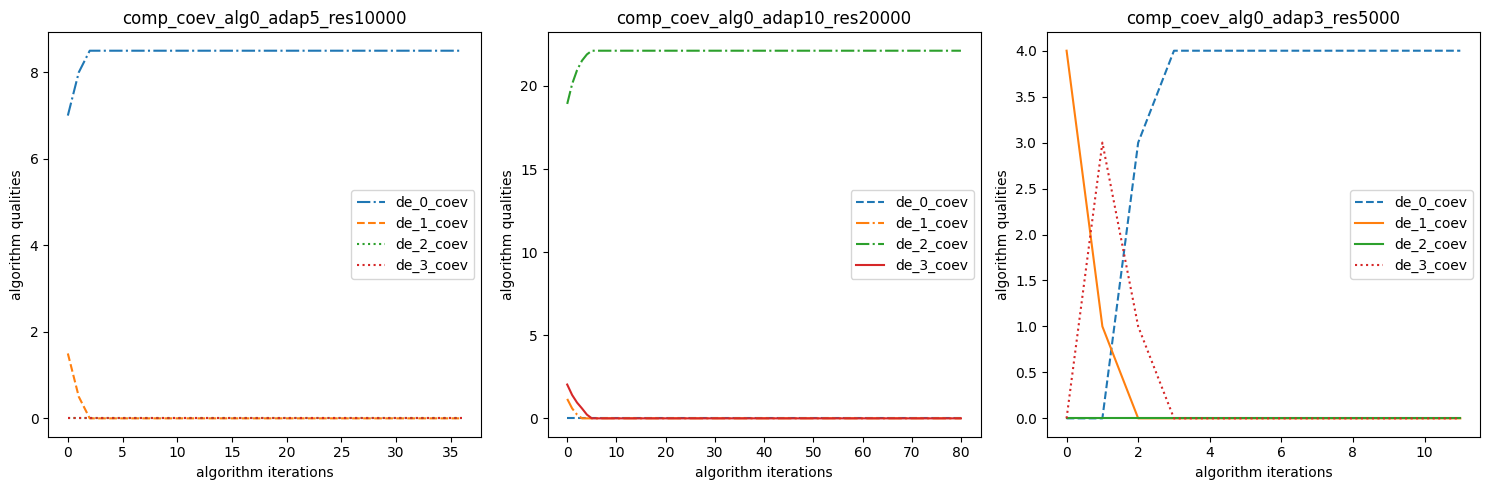

In [5]:
fig, axs = plt.subplots(1, 3)

for i, exp in enumerate(de_dict.keys()):
    for alg in de_dict[exp].keys():
        axs[i].plot(de_dict[exp][alg], label=alg, linestyle=random.choice(line_styles))
    
    axs[i].set_title(exp)
    axs[i].legend(loc="best")
    axs[i].set_xlabel('algorithm iterations')
    axs[i].set_ylabel('algorithm qualities')
    
plt.tight_layout()
plt.show()

## GEP Qualities

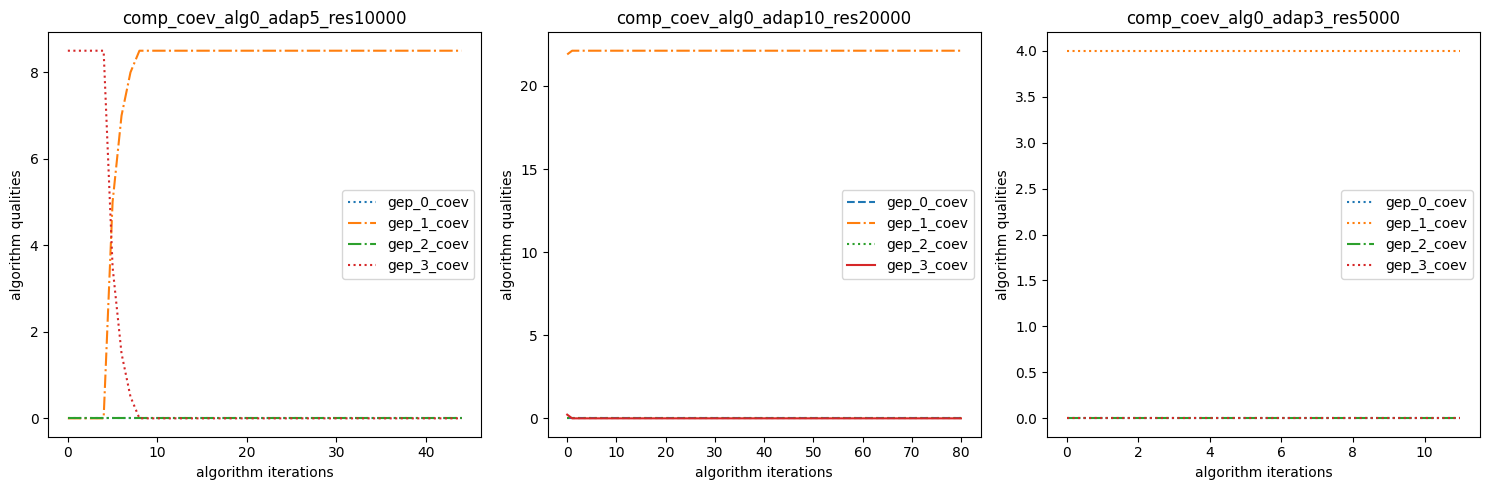

In [6]:
fig, axs = plt.subplots(1, 3)

for i, exp in enumerate(gep_dict.keys()):
    for alg in gep_dict[exp].keys():
        axs[i].plot(gep_dict[exp][alg], label=alg, linestyle=random.choice(line_styles))
    
    axs[i].set_title(exp)
    axs[i].legend(loc="best")
    axs[i].set_xlabel('algorithm iterations')
    axs[i].set_ylabel('algorithm qualities')
    
plt.tight_layout()
plt.show()

## GEP + DE Qualities

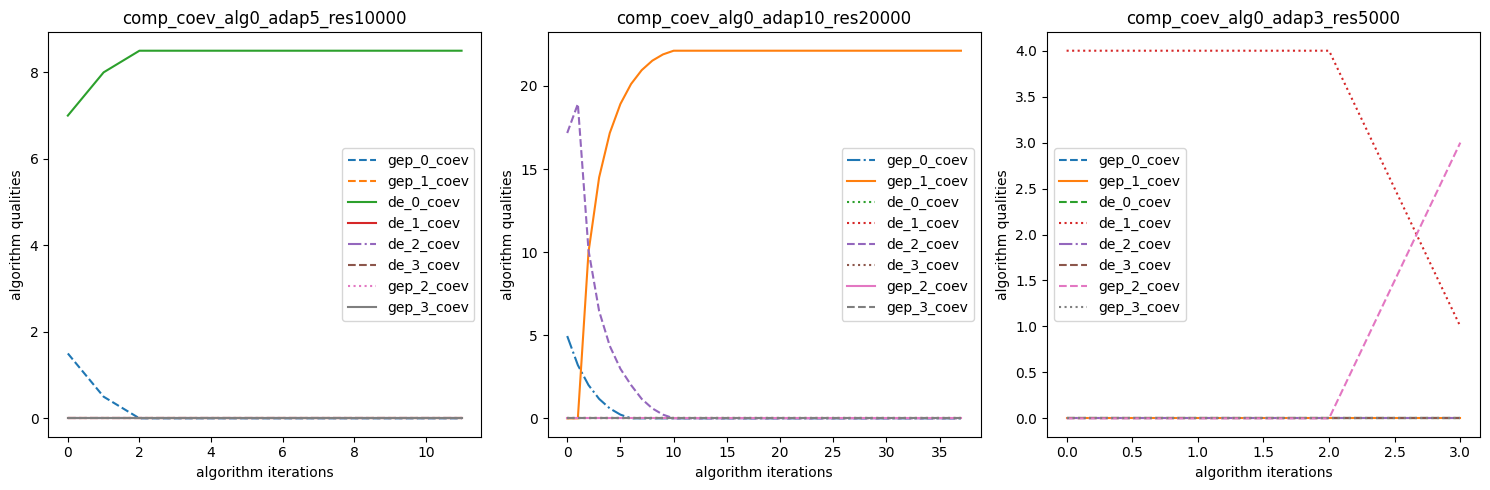

In [7]:
fig, axs = plt.subplots(1, 3)

for i, exp in enumerate(gep_de_dict.keys()):
    for alg in gep_de_dict[exp].keys():
        axs[i].plot(gep_de_dict[exp][alg], label=alg, linestyle=random.choice(line_styles))
    
    axs[i].set_title(exp)
    axs[i].legend(loc="best")
    axs[i].set_xlabel('algorithm iterations')
    axs[i].set_ylabel('algorithm qualities')
    
plt.tight_layout()
plt.show()